In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
pima_df = pd.read_csv("cleaned_data.csv")
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
array = pima_df.values
X = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]
#X = array[:,0:8] # select all rows and first 8 columns which are the attributes
#Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
models = {
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))


    print('----------------------------------')


    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))

    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logisitic Regression
Model performance for Training set
- Accuracy: 0.7728
- F1 score: 0.7654
- Precision: 0.7103
- Recall: 0.5628
- Roc Auc Score: 0.7221
----------------------------------
Model performance for Test set
- Accuracy: 0.7835
- F1 score: 0.7750
- Precision: 0.7778
- Recall: 0.5765
- Roc Auc Score: 0.7403


Decision Tree
Model performance for Training set
- Accuracy: 0.8138
- F1 score: 0.8106
- Precision: 0.7578
- Recall: 0.6667
- Roc Auc Score: 0.7782
----------------------------------
Model performance for Test set
- Accuracy: 0.7619
- F1 score: 0.7588
- Precision: 0.6974
- Recall: 0.6235
- Roc Auc Score: 0.7330


Random Forest
Model performance for Training set
- Accuracy: 0.8641
- F1 score: 0.8595
- Precision: 0.8819
- Recall: 0.6940
- Roc Auc Score: 0.8230
----------------------------------
Model performance for Test set
- Accuracy: 0.7879
- F1 score: 0.7800
- Precision: 0.7812
- Recall: 0.5882
- Roc Auc Score: 0.7462




In [6]:
# # Hyper parameter training

# rf_params = {"max_depth": [5, 8, 15, None, 10],
#              "max_feature": [5,7, "auto", 8],
#              "min_samples_split": [2, 8, 15, 20],
#              "n_estimators": [100, 200, 500, 1000]}

In [14]:
#rf_params

In [ ]:
# # Model list for hyperparameter tuning
# randomcv_models = [
#     ("RF", RandomForestClassifier(), rf_params)
# ]

In [ ]:
#randomcv_models

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# model_param = {}
# for name, model, params in randomcv_models:
#     random = RandomizedSearchCV(estimator=model,
#                                 param_distributions=params,
#                                 n_iter=100,
#                                 cv=3,
#                                 verbose=2,
#                                 n_jobs=-1)

#     random.fit(X_train, y_train)
#     model_param[name] = random.best_params_

# for model_name in model_param:
#     print(f"---------------- Best Params for {model_name} ----------------")
#     print(model_param[model_name])


In [40]:
rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],  # corrected parameter name
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

# Define the hyperparameter grid for DecisionTreeClassifier
dt_params = {
    "max_depth": [5, 10, 15, None],
    "max_features": [None, "auto", "sqrt", "log2"],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}


In [42]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [44]:
dt_params

{'max_depth': [5, 10, 15, None],
 'max_features': [None, 'auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 2, 4],
 'criterion': ['gini', 'entropy']}

In [46]:
# Model list for hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("dt", DecisionTreeClassifier(), dt_params)
]

In [48]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('dt',
  DecisionTreeClassifier(),
  {'max_depth': [5, 10, 15, None],
   'max_features': [None, 'auto', 'sqrt', 'log2'],
   'min_samples_split': [2, 10, 20],
   'min_samples_leaf': [1, 2, 4],
   'criterion': ['gini', 'entropy']})]

In [50]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)

    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ----------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
72 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\skle

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF ----------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 5}
---------------- Best Params for dt ----------------
{'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
63 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\skle

In [56]:
models = {
    "Decision Tree": DecisionTreeClassifier(min_samples_split=20, max_depth=5, min_samples_leaf=5, max_features='log2', criterion='gini'),
    "Random Forest": RandomForestClassifier(n_estimators = 500, min_samples_split=15, max_features=8, max_depth=5)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_train_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate accuracy
    model_train_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_train_precision = precision_score(y_test, y_test_pred)
    model_train_recall = recall_score(y_test, y_test_pred)
    model_train_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))


    print('----------------------------------')


    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))

    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Decision Tree
Model performance for Training set
- Accuracy: 0.7229
- F1 score: 0.7028
- Precision: 0.7059
- Recall: 0.4235
- Roc Auc Score: 0.6604
----------------------------------
Model performance for Test set
- Accuracy: 0.7879
- F1 score: 0.7800
- Precision: 0.7812
- Recall: 0.5882
- Roc Auc Score: 0.7462


Random Forest
Model performance for Training set
- Accuracy: 0.7879
- F1 score: 0.7828
- Precision: 0.7571
- Recall: 0.6235
- Roc Auc Score: 0.7535
----------------------------------
Model performance for Test set
- Accuracy: 0.7879
- F1 score: 0.7800
- Precision: 0.7812
- Recall: 0.5882
- Roc Auc Score: 0.7462




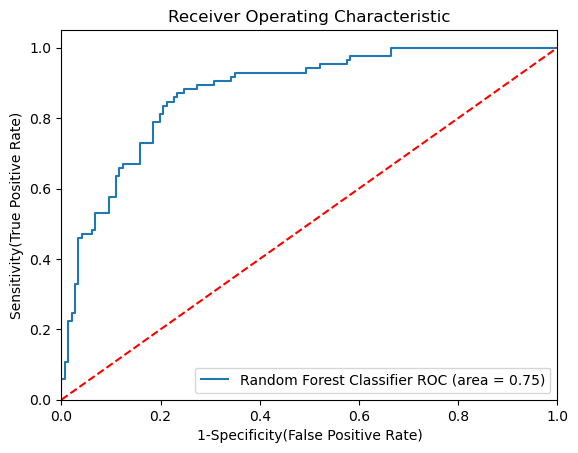

In [36]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500, min_samples_split=15,
                                    max_features=8, max_depth=5),
    'auc': 0.7462
},
]

# Create loop through all models
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
    
    # Compute False positive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

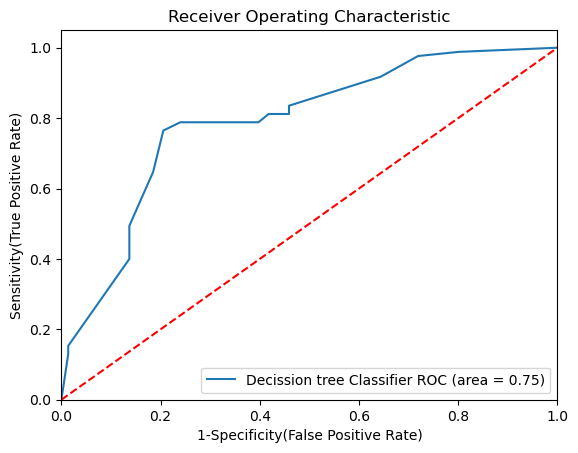

In [58]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Decission tree Classifier',
    'model': DecisionTreeClassifier(min_samples_split=20, max_depth=5, 
                                    min_samples_leaf=5, max_features='log2', criterion='gini'),
    'auc': 0.7462
},
]

# Create loop through all models
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
    
    # Compute False positive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

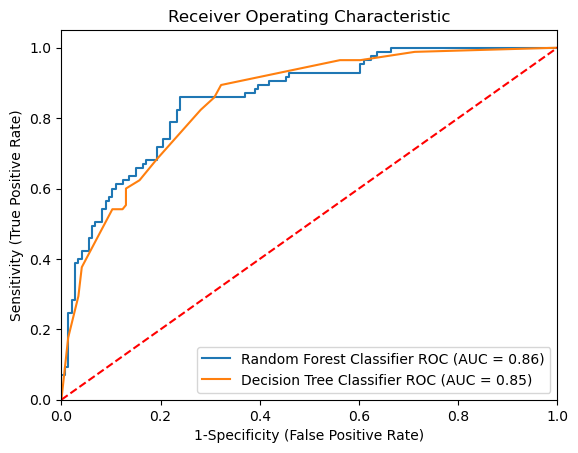

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the RandomForestClassifier and DecisionTreeClassifier with the best hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, max_features=7, min_samples_split=8)
dt_model = DecisionTreeClassifier(min_samples_split=20, max_depth=5, min_samples_leaf=5, max_features='log2', criterion='gini')

# List to hold models and their labels
auc_models = [
    {'label': 'Random Forest Classifier', 'model': rf_model},
    {'label': 'Decision Tree Classifier', 'model': dt_model}
]

# Plot ROC curves for each model
plt.figure()

for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)  # Train the model
    
    # Predict probabilities and compute ROC curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (algo['label'], auc_score))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()
